In [3]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

(0, 300)

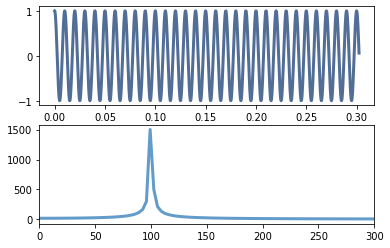

In [4]:
"""
Exercise 3.1
"""
signal = thinkdsp.CosSignal(amp= 1, freq = 100, offset = 0)
duration = signal.period*30.25 #not a perfect multiple
wave = signal.make_wave(duration,framerate=11025)
spectrum = wave.make_spectrum()
plt.subplot(2,1,1)
wave.plot()
plt.subplot(2,1,2)
spectrum.plot()
plt.xlim(0,300)

(0, 300)

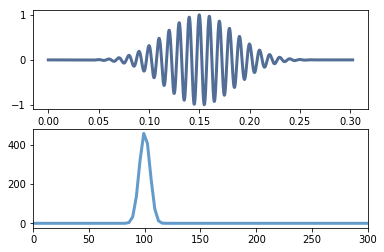

In [64]:
#kaiser - can play with beta. see scipy documentation
wave = signal.make_wave(duration,framerate=11025)
window = np.kaiser(len(wave),20)
wave.window(window)
spectrum = wave.make_spectrum()
plt.subplot(2,1,1)
wave.plot()
plt.subplot(2,1,2)
spectrum.plot()
plt.xlim(0,300)

(0, 300)

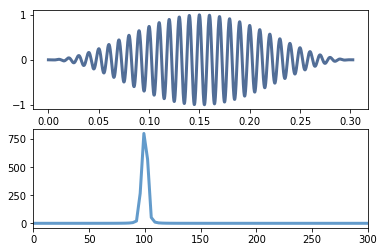

In [51]:
#hanning
wave = signal.make_wave(duration,framerate=11025)
window = np.hanning(len(wave))
wave.window(window)
spectrum = wave.make_spectrum()
plt.subplot(2,1,1)
wave.plot()
plt.subplot(2,1,2)
spectrum.plot()
plt.xlim(0,300)

(0, 300)

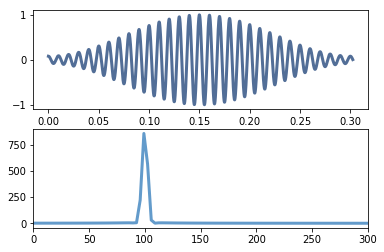

In [50]:
#hamming
wave = signal.make_wave(duration,framerate=11025)
window = np.hamming(len(wave))
wave.window(window)
spectrum = wave.make_spectrum()
plt.subplot(2,1,1)
wave.plot()
plt.subplot(2,1,2)
spectrum.plot()
plt.xlim(0,300)

(0, 300)

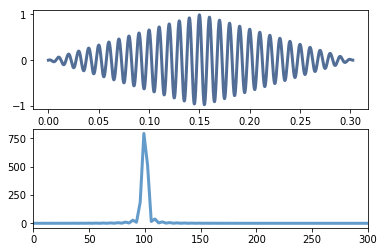

In [49]:
#bartlett
wave = signal.make_wave(duration,framerate=11025)
window = np.bartlett(len(wave))
wave.window(window)
spectrum = wave.make_spectrum()
plt.subplot(2,1,1)
wave.plot()
plt.subplot(2,1,2)
spectrum.plot()
plt.xlim(0,300)

(0, 300)

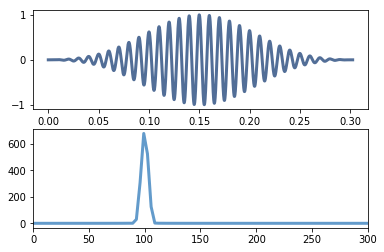

In [53]:
#blackman
wave = signal.make_wave(duration,framerate=11025)
window = np.blackman(len(wave))
wave.window(window)
spectrum = wave.make_spectrum()
plt.subplot(2,1,1)
wave.plot()
plt.subplot(2,1,2)
spectrum.plot()
plt.xlim(0,300)

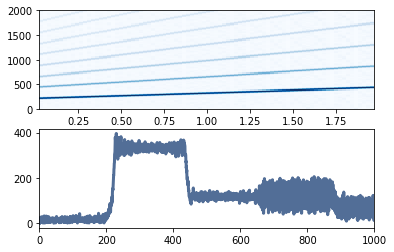

In [5]:
"""
Exercise 3.2
"""
import math

PI2 = math.pi*2

#recall y = A*cos(2*pi*f*t + phi) where
# A is amplitude
# 2*pi*f*t is the phase (in rads) of the cos wave
# phi is a phase offset
class SawtoothChirp(thinkdsp.Chirp):
    """"
    inherits chirp, overrides _evaluate
    _evaluate computes the time interval between frames and change 
    in phase of the chirp signal for each time interval.
    Then computes the accumulated phase change so far per time step
    since the beginning.
    Then converts accumulated phase to accumulated cycles and uses
    the cycle information to generate a sawtooth amplitude array.
    
    """
    def _evaluate(self, ts, freqs):
        dts = np.diff(ts) #interval time between frames
        dphis = PI2*freqs*dts #change in phase per interval
        phases = np.cumsum(dphis) #total phase per time step
        phases = np.insert(phases,0,0) #start phase at 0
        cycles = phases / PI2 #convert total phase to cycles
        frac, _ = np.modf(cycles) #make sawtooth from cycle count
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

saw = SawtoothChirp(start = 220, end = 440)
wave = saw.make_wave(duration =2, framerate = 11025)

spectrogram = wave.make_spectrogram(seg_length =512)
plt.subplot(2,1,1)
spectrogram.plot()
plt.ylim(0,2000)

spectrum = wave.make_spectrum()
plt.subplot(2,1,2)
spectrum.plot()
plt.xlim(0, 1000)

wave.make_audio()

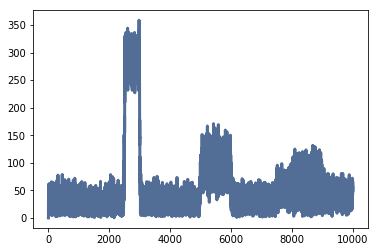

In [20]:
"""
Exercise 3.3
"""
sawchirp = SawtoothChirp(start =2500, end =3000)
sawchirpwave = sawchirp.make_wave(duration=1 , framerate = 20000)

sawchirpspectrum  = sawchirpwave.make_spectrum()
sawchirpspectrum.plot()


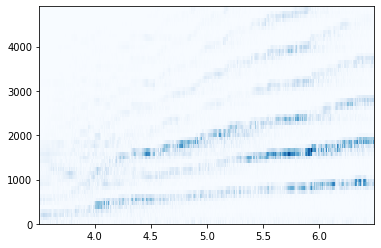

In [9]:
"""
Exercise 3.4

"""
rhapsody = thinkdsp.read_wave('GeorgeGershwinRhapsodyinBluearr.JerryBrubaker.wav')
rhap_seg = rhapsody.segment(start = 3.5, duration =3)
spectrogram = rhap_seg.make_spectrogram(512)
display(rhap_seg.make_audio())
spectrogram.plot(high=5000)

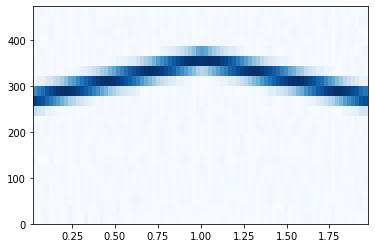

In [10]:
"""
Exercise 3.5
"""
class TromboneGliss(SawtoothChirp):
    """
    Extends Chirp, overrides evaluate to generate a linspace
    of linearly increasing then decreasing intervals over ts.
    Split ts into two segments where 1 increases 
    and 1 decreases. Appends the two segments and returns the array. 
    
    Can be made to inherit SawtoothChirp for fun
    More trombone sounding!
    """
    def evaluate(self,ts): 
        freqs = np.linspace(self.start, self.end, round(len(ts)/2)) #round for integers!
        freqs = np.append(freqs,np.linspace(self.end, self.start, round(len(ts)/2-1))) #round for integers!
        return self._evaluate(ts, freqs)
        
tbonegliss = TromboneGliss(start = 262, end = 349)
wave = tbonegliss.make_wave(duration=2, framerate = 11025)
spectrogram = wave.make_spectrogram(512)
spectrogram.plot(high=500)
wave.make_audio()

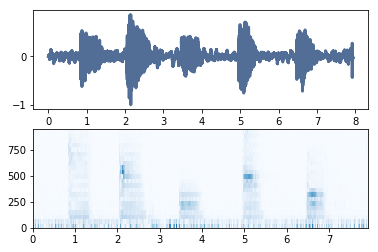

In [13]:
"""
Exercise 3.6
"""
vowels = thinkdsp.read_wave('87778__marcgascon7__vocals.wav') #funny, same as the author by coincidence
spectrogram=vowels.make_spectrogram(1024)
plt.subplot(2,1,1)
vowels.plot()
plt.subplot(2,1,2)
spectrogram.plot(high=1000)
vowels.make_audio()

#authors solution goes into the spectral composition of each vowel....I'll look at a few too.

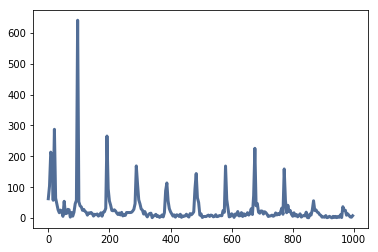

In [36]:
u = vowels.segment(start = 1, duration = 0.25) #smack in the middle of 'ah'
spectrum = u.make_spectrum()
spectrum.plot(high=1000)
#segment can be modified to see different vowel spectral content